# First try at water quality prediction

In [ ]:
import pandas as pd

In [ ]:
train_data_url = 'https://drive.google.com/uc?id=1bJjSZDAfn7UbX2xt0I-VmsLAjk9n7IXh'
kaggle_test_url = 'https://drive.google.com/uc?id=1SH_Xo_MjrLuMICFmpD4exHFrN8YbeRE8'
df = pd.read_csv(train_data_url, delimiter=',')
kaggle_test = pd.read_csv(kaggle_test_url, delimiter=',')

In [ ]:
df.head()

,station_id,Aluminium_2019,Aluminium_2020,Ammonium_2019,Ammonium_2020,Boron_2019,Boron_2020,Chloride_2019,Chloride_2020,Coli-like-bacteria-Colilert_2019,...,Taste-ball-units_2020,Taste-dilution-degree_2019,Taste-dilution-degree_2020,Turbidity-NTU_2019,Turbidity-NTU_2020,pH _2019,pH _2020,compliance_2019,compliance_2020,compliance_2021
0,487,NaN,NaN,0.05,0.05,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,1.6,0.2,7.80,7.60,0,0,0
1,1555,NaN,NaN,0.05,0.05,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,1.0,1.0,7.30,7.10,0,0,0
2,205,NaN,10.0,0.05,0.24,NaN,0.100,NaN,NaN,NaN,...,NaN,1.0,1.0,1.0,1.0,7.80,7.70,0,0,0
3,1228,NaN,NaN,0.09,0.05,0.641,0.932,NaN,NaN,NaN,...,1.0,NaN,NaN,0.5,0.5,7.44,7.58,0,0,0
4,470,NaN,NaN,0.06,0.05,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,0.2,44.0,7.70,8.00,0,1,0


Preprocessing

In [ ]:
df = df.fillna(0)
df = df.drop('station_id', axis=1)

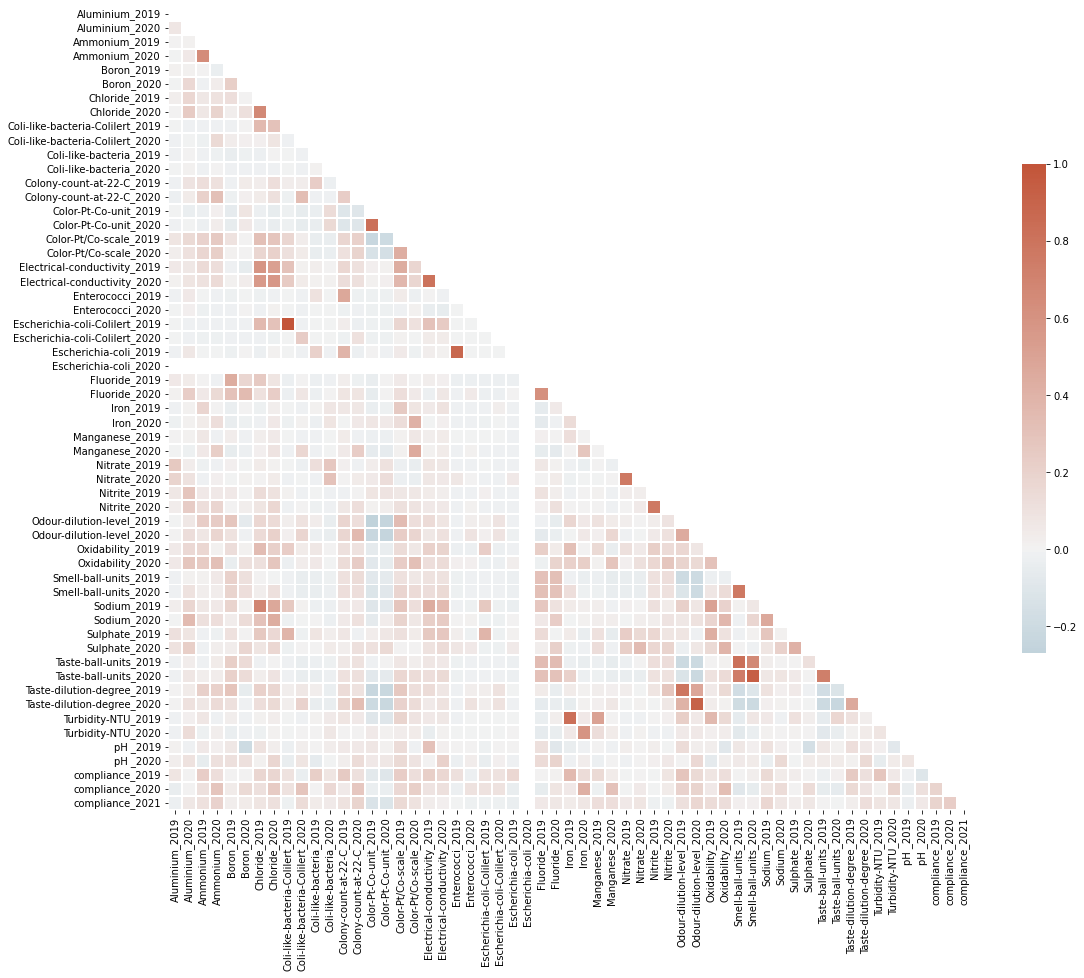

In [ ]:
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=1, cbar_kws={"shrink": .5})

Models

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('compliance_2021', axis=1)
y = df['compliance_2021']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='rbf')
model.fit(X_train, y_train)
model.score(X_test, y_test)

kaggle_test_copy = kaggle_test.drop('station_id', axis=1)
kaggle_test_copy = kaggle_test_copy.fillna(0)
pred = model.predict(kaggle_test_copy)

# this is just predicting everything as 0 and scored a 0.9
# completely worthless at predicting which stations need compliance testing
# need to consider balancing the data, do something with false positives/negatives (auc, accuracy, recall, f1?)
submission = pd.DataFrame({'station_id': kaggle_test['station_id'], 'compliance_2021': pred})
submission.to_csv('svc_rbf.csv', index=False)

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X_train, y_train)
model.score(X_test, y_test)

model.predict(kaggle_test_copy)
# pred = model.predict(kaggle_test_copy)
# submission = pd.DataFrame({'station_id': kaggle_test['station_id'], 'compliance_2021': pred})
# submission.to_csv('svc_linear.csv', index=False)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0])

In [ ]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)

param = {'eval_metric': 'auc', 'num_class': 1, 'objective': 'binary:logistic'}
eval_list = [(dtrain, 'train'), (dtest, 'eval')]
model = xgb.train(param, dtrain, 500, eval_list, early_stopping_rounds=50, verbose_eval=True)

# pred = model.predict(xgb.DMatrix(kaggle_test_copy))
# submission = pd.DataFrame({'station_id': kaggle_test['station_id'], 'compliance_2021': np.round(pred)})
# submission.to_csv('xgb_auc.csv', index=False)

[0]	train-auc:0.860956	eval-auc:0.594846
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 50 rounds.
[1]	train-auc:0.904984	eval-auc:0.608553
[2]	train-auc:0.916201	eval-auc:0.586623
[3]	train-auc:0.92574	eval-auc:0.547149
[4]	train-auc:0.943139	eval-auc:0.605263
[5]	train-auc:0.970575	eval-auc:0.616776
[6]	train-auc:0.978499	eval-auc:0.645833
[7]	train-auc:0.991455	eval-auc:0.643092
[8]	train-auc:0.994594	eval-auc:0.636513
[9]	train-auc:0.996893	eval-auc:0.616228
[10]	train-auc:0.998136	eval-auc:0.615132
[11]	train-auc:0.998509	eval-auc:0.607456
[12]	train-auc:0.99826	eval-auc:0.601974
[13]	train-auc:0.998819	eval-auc:0.60307
[14]	train-auc:0.999379	eval-auc:0.607456
[15]	train-auc:0.999751	eval-auc:0.619518
[16]	train-auc:0.999938	eval-auc:0.642544
[17]	train-auc:1	eval-auc:0.64364
[18]	train-auc:1	eval-auc:0.635965
[19]	train-auc:1	eval-auc:0.631579
[20]	train-auc:1	eval-auc:0.628289
[21]	train-auc:1	ev

In [ ]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)

param = {'eval_metric': 'error', 'num_class': 1, 'objective': 'binary:logistic'}
eval_list = [(dtrain, 'train'), (dtest, 'eval')]
model = xgb.train(param, dtrain, 500, eval_list, early_stopping_rounds=50, verbose_eval=True)


#pred = model.predict(xgb.DMatrix(kaggle_test_copy))
#submission = pd.DataFrame({'station_id': kaggle_test['station_id'], 'compliance_2021': np.round(pred)})
#submission.to_csv('xgb_error.csv', index=False)

[0]	train-error:0.079545	eval-error:0.215909
Multiple eval metrics have been passed: 'eval-error' will be used for early stopping.

Will train until eval-error hasn't improved in 50 rounds.
[1]	train-error:0.068182	eval-error:0.204545
[2]	train-error:0.065341	eval-error:0.193182
[3]	train-error:0.051136	eval-error:0.193182
[4]	train-error:0.042614	eval-error:0.193182
[5]	train-error:0.036932	eval-error:0.170455
[6]	train-error:0.034091	eval-error:0.159091
[7]	train-error:0.025568	eval-error:0.159091
[8]	train-error:0.025568	eval-error:0.159091
[9]	train-error:0.022727	eval-error:0.159091
[10]	train-error:0.017045	eval-error:0.170455
[11]	train-error:0.014205	eval-error:0.170455
[12]	train-error:0.011364	eval-error:0.170455
[13]	train-error:0.008523	eval-error:0.159091
[14]	train-error:0.008523	eval-error:0.170455
[15]	train-error:0.008523	eval-error:0.159091
[16]	train-error:0.005682	eval-error:0.170455
[17]	train-error:0.005682	eval-error:0.170455
[18]	train-error:0.005682	eval-error:

# 2 different fillna strategy

In [ ]:
import pandas as pd
train_data_url = 'https://drive.google.com/uc?id=1bJjSZDAfn7UbX2xt0I-VmsLAjk9n7IXh'
kaggle_test_url = 'https://drive.google.com/uc?id=1SH_Xo_MjrLuMICFmpD4exHFrN8YbeRE8'
df = pd.read_csv(train_data_url, delimiter=',')
kaggle_test = pd.read_csv(kaggle_test_url, delimiter=',')

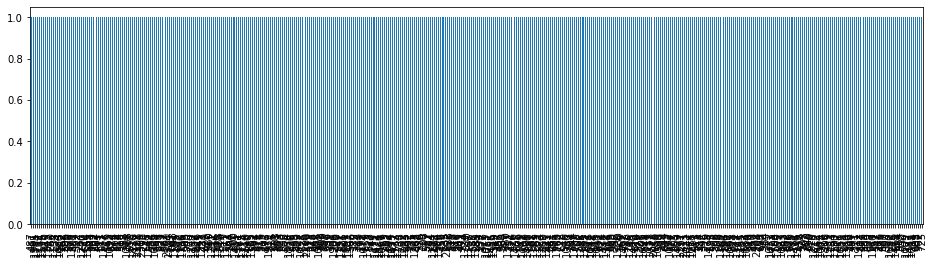

station_id - min:165, max:2311, mean:847.8840909090909, trimmed mean 80%:801.6590909090909
--------------


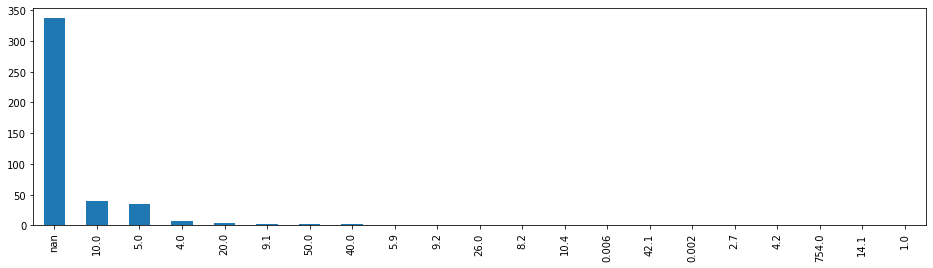

Aluminium_2019 - min:0.002, max:754.0, mean:16.93211650485437, trimmed mean 80%:7.881927710843373
--------------


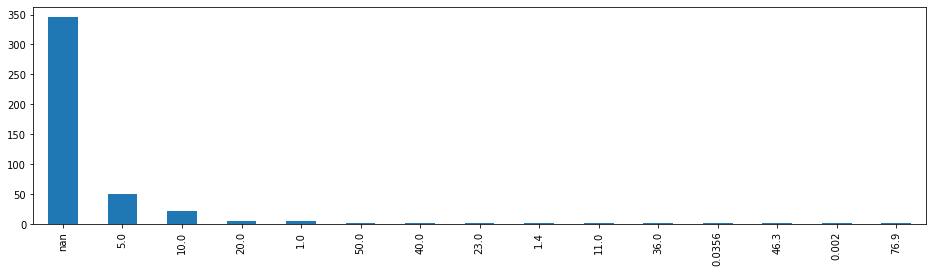

Aluminium_2020 - min:0.002, max:76.9, mean:10.102527659574466, trimmed mean 80%:7.315789473684211
--------------


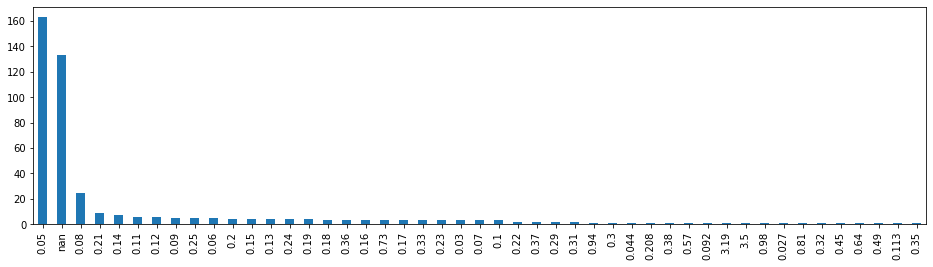

Ammonium_2019 - min:0.027, max:3.5, mean:0.13975244299674267, trimmed mean 80%:0.08855465587044535
--------------


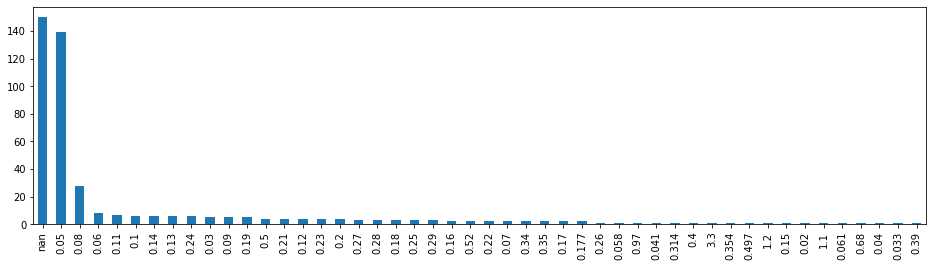

Ammonium_2020 - min:0.02, max:3.3, mean:0.13235172413793106, trimmed mean 80%:0.0903146551724138
--------------


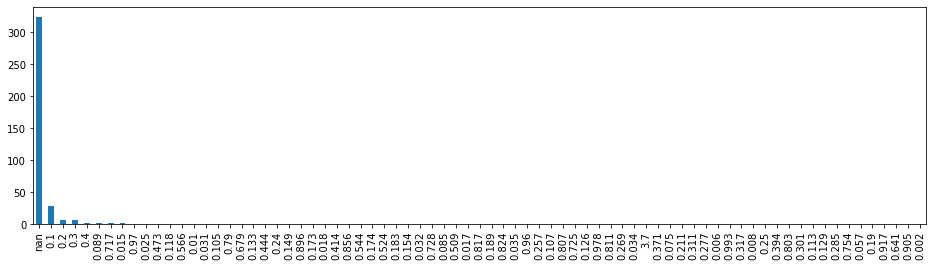

Boron_2019 - min:0.002, max:3.7, mean:0.32181896551724143, trimmed mean 80%:0.25889361702127656
--------------


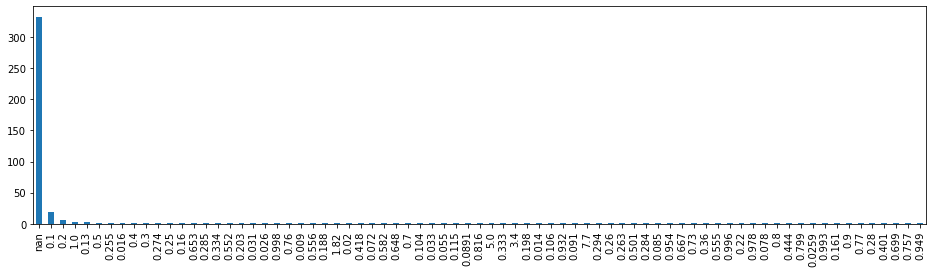

Boron_2020 - min:0.009, max:7.7, mean:0.4970833333333334, trimmed mean 80%:0.33559204545454546
--------------


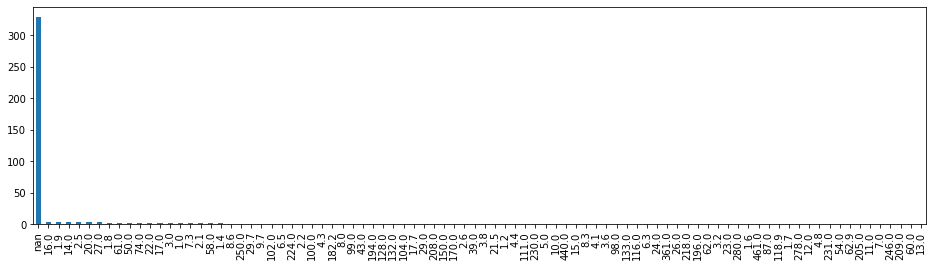

Chloride_2019 - min:1.0, max:461.0, mean:68.04684684684685, trimmed mean 80%:48.51123595505618
--------------


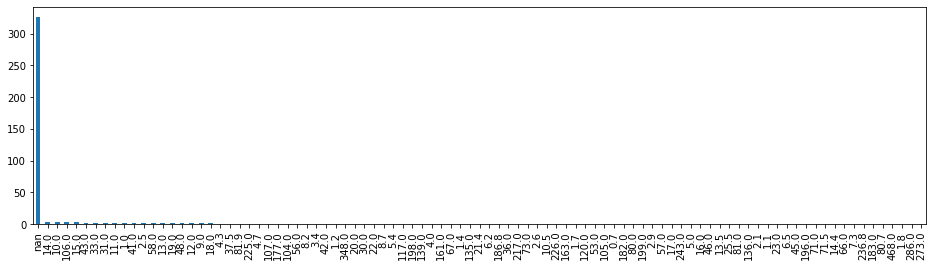

Chloride_2020 - min:0.7, max:468.0, mean:66.51491228070175, trimmed mean 80%:50.49891304347827
--------------


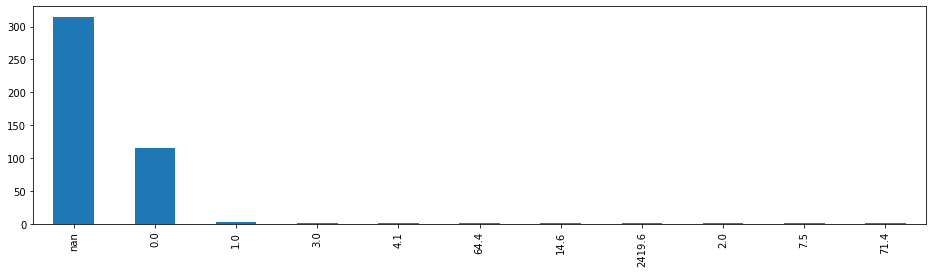

Coli-like-bacteria-Colilert_2019 - min:0.0, max:2419.6, mean:20.7088, trimmed mean 80%:0.0
--------------


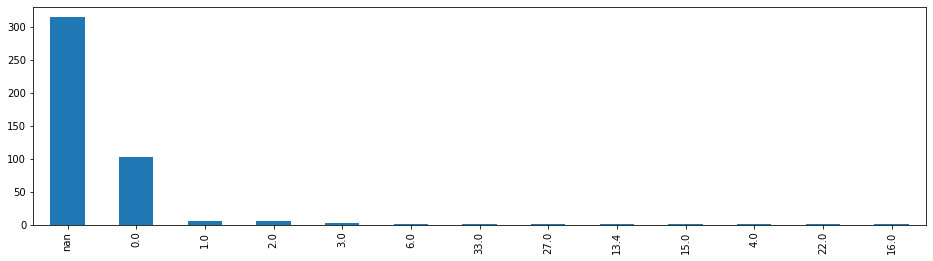

Coli-like-bacteria-Colilert_2020 - min:0.0, max:33.0, mean:1.3072000000000001, trimmed mean 80%:0.15841584158415842
--------------


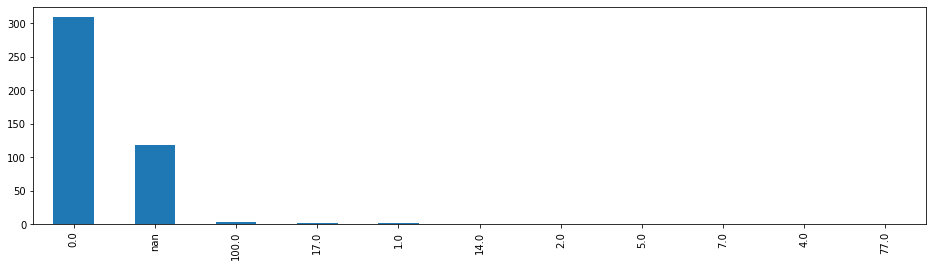

Coli-like-bacteria_2019 - min:0.0, max:100.0, mean:1.3819875776397517, trimmed mean 80%:0.0
--------------


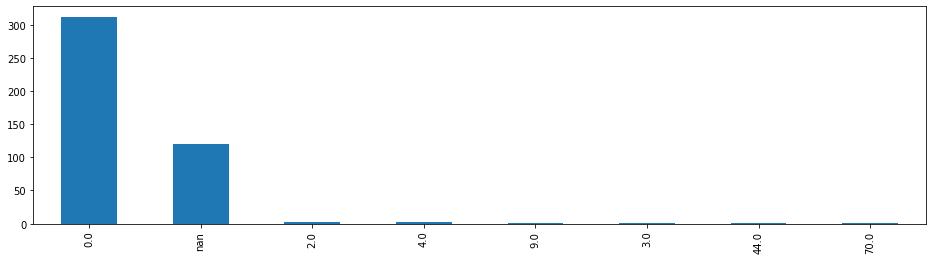

Coli-like-bacteria_2020 - min:0.0, max:70.0, mean:0.43125, trimmed mean 80%:0.0
--------------


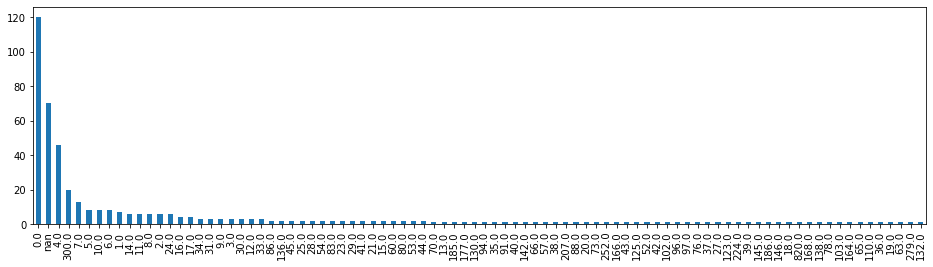

Colony-count-at-22-C_2019 - min:0.0, max:820.0, mean:39.82432432432432, trimmed mean 80%:17.10810810810811
--------------


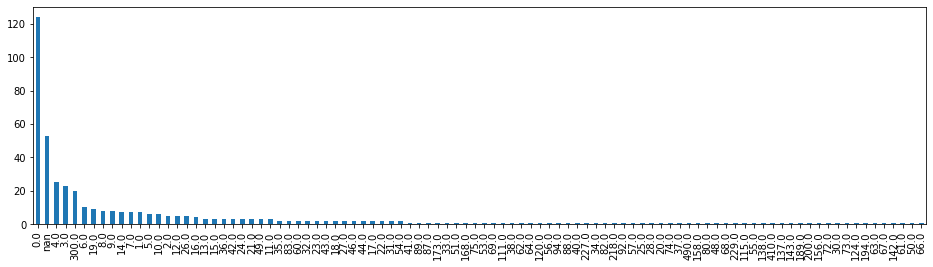

Colony-count-at-22-C_2020 - min:0.0, max:490.0, mean:38.012919896640824, trimmed mean 80%:16.382636655948552
--------------


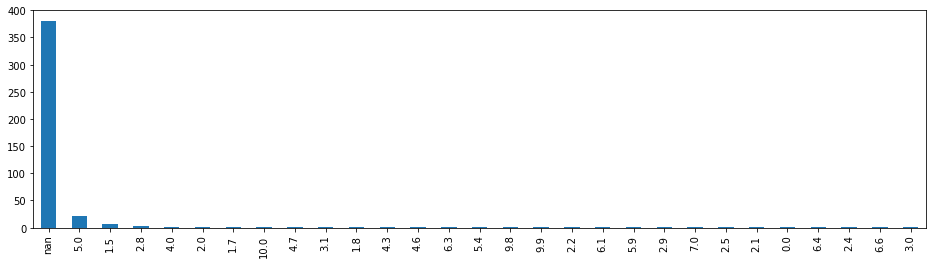

Color-Pt-Co-unit_2019 - min:0.0, max:10.0, mean:4.233898305084746, trimmed mean 80%:4.091836734693878
--------------


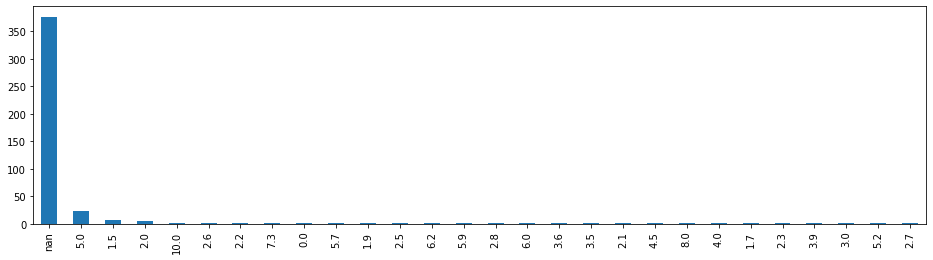

Color-Pt-Co-unit_2020 - min:0.0, max:10.0, mean:4.0507936507936515, trimmed mean 80%:3.8999999999999995
--------------


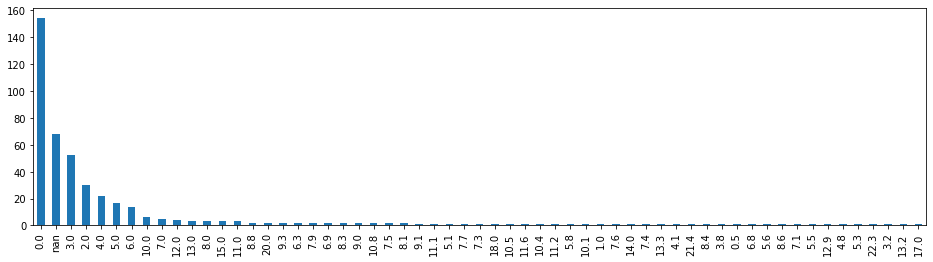

Color-Pt/Co-scale_2019 - min:0.0, max:22.3, mean:3.4260752688172045, trimmed mean 80%:2.6540268456375844
--------------


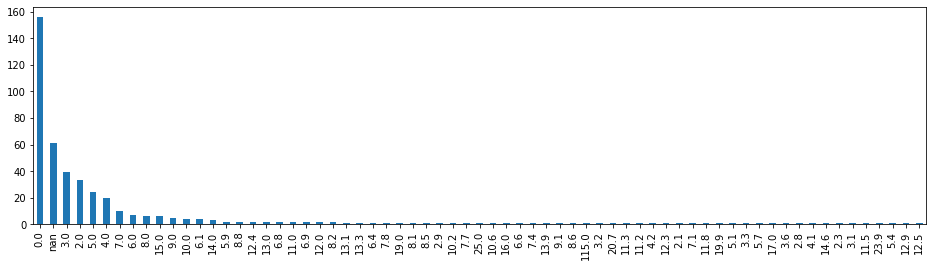

Color-Pt/Co-scale_2020 - min:0.0, max:115.0, mean:3.945118733509234, trimmed mean 80%:2.822622950819672
--------------


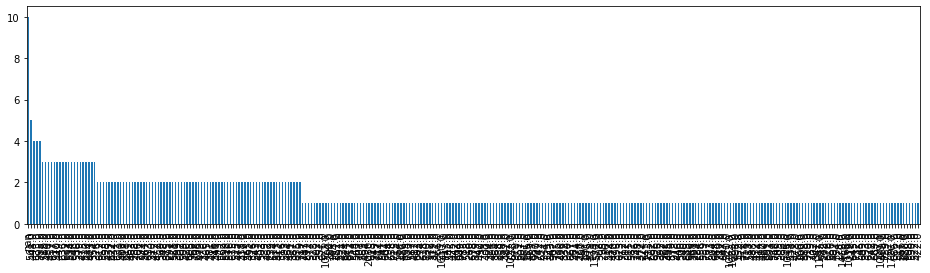

Electrical-conductivity_2019 - min:33.0, max:2080.0, mean:553.7009302325581, trimmed mean 80%:531.4098837209302
--------------


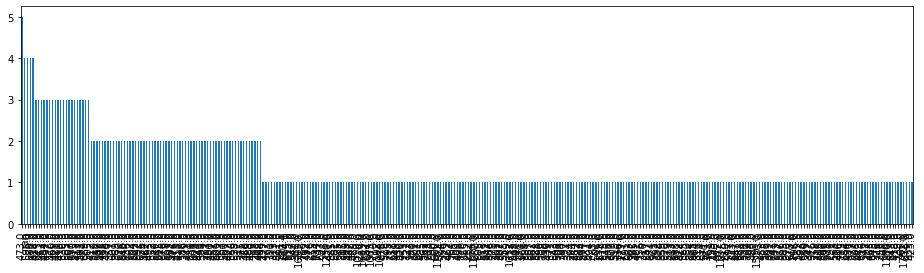

Electrical-conductivity_2020 - min:63.0, max:1752.0, mean:566.0077981651376, trimmed mean 80%:546.4685714285714
--------------


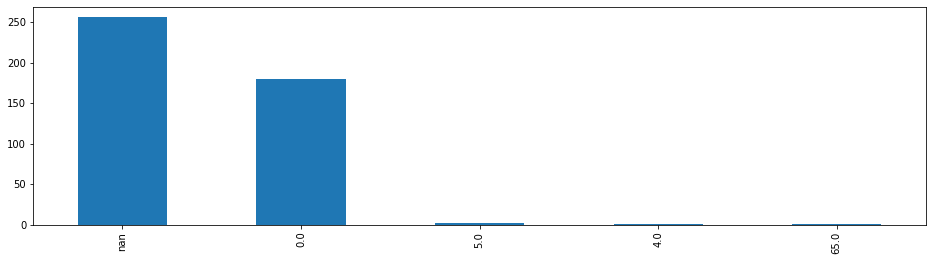

Enterococci_2019 - min:0.0, max:65.0, mean:0.42934782608695654, trimmed mean 80%:0.0
--------------


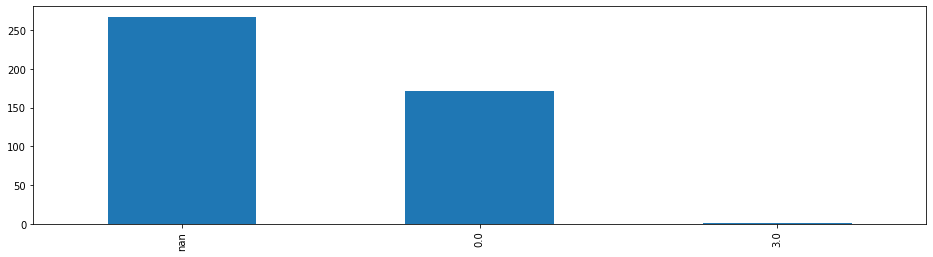

Enterococci_2020 - min:0.0, max:3.0, mean:0.017341040462427744, trimmed mean 80%:0.0
--------------


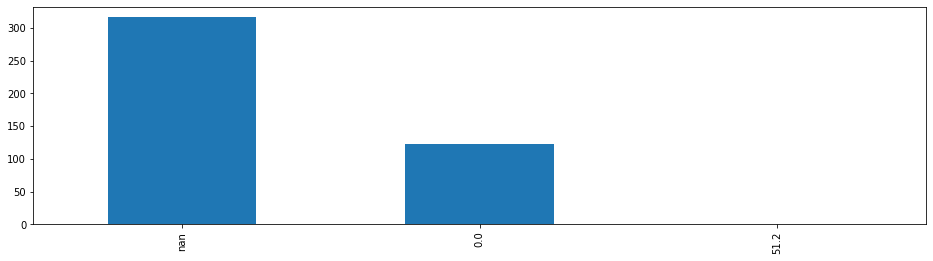

Escherichia-coli-Colilert_2019 - min:0.0, max:51.2, mean:0.4129032258064516, trimmed mean 80%:0.0
--------------


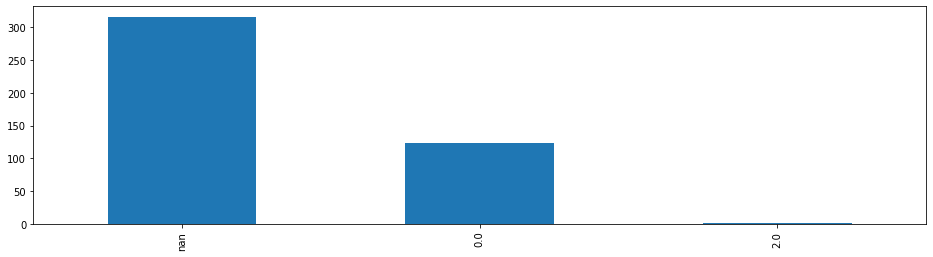

Escherichia-coli-Colilert_2020 - min:0.0, max:2.0, mean:0.016129032258064516, trimmed mean 80%:0.0
--------------


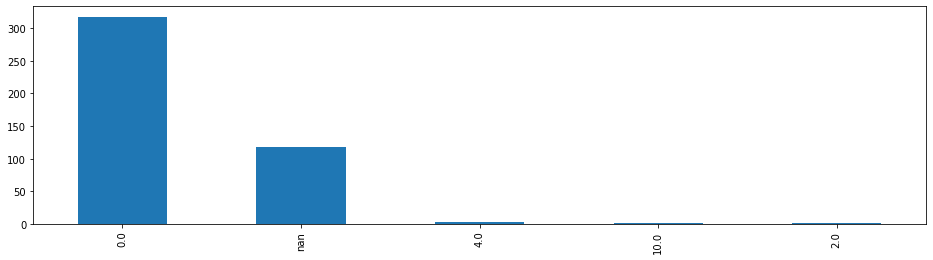

Escherichia-coli_2019 - min:0.0, max:10.0, mean:0.062111801242236024, trimmed mean 80%:0.0
--------------


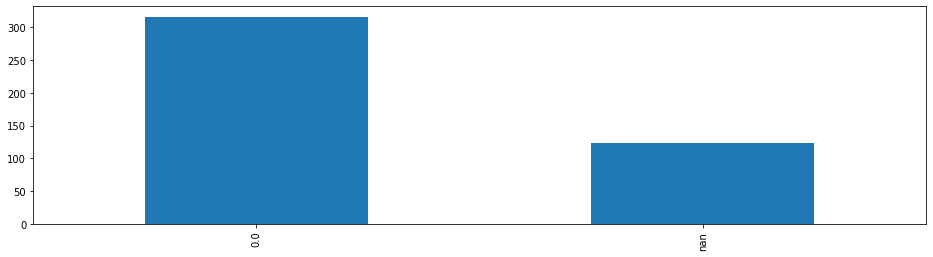

Escherichia-coli_2020 - min:0.0, max:0.0, mean:0.0, trimmed mean 80%:0.0
--------------


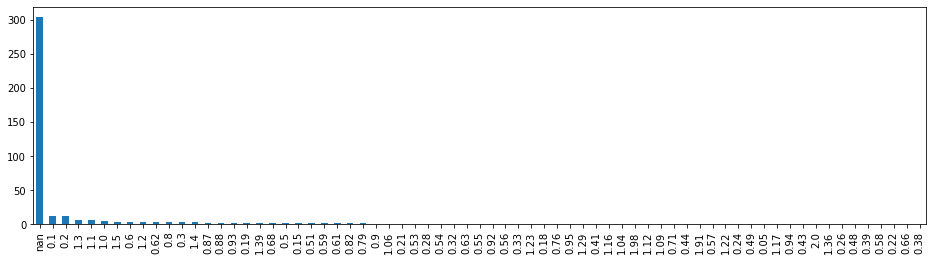

Fluoride_2019 - min:0.05, max:2.0, mean:0.708235294117647, trimmed mean 80%:0.6803636363636364
--------------


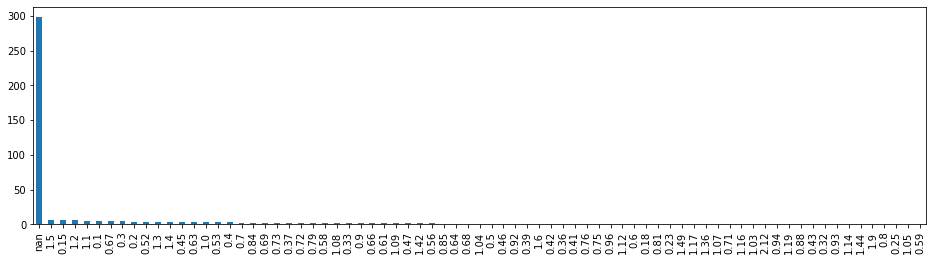

Fluoride_2020 - min:0.1, max:2.12, mean:0.7654225352112676, trimmed mean 80%:0.7449122807017545
--------------


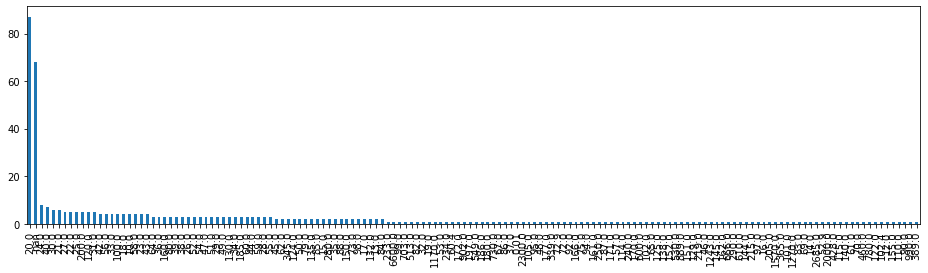

Iron_2019 - min:0.01, max:6600.0, mean:136.87798387096774, trimmed mean 80%:59.995302013422815
--------------


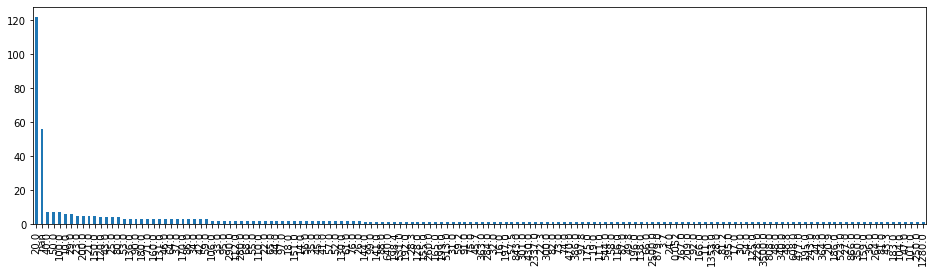

Iron_2020 - min:0.052, max:3500.0, mean:117.89258333333333, trimmed mean 80%:61.993506493506494
--------------


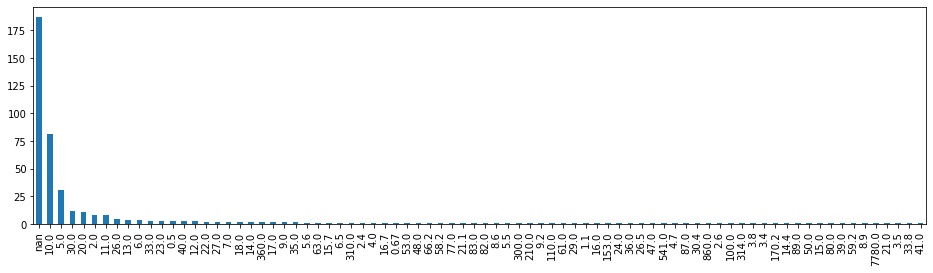

Manganese_2019 - min:0.5, max:7780.0, mean:61.266284584980234, trimmed mean 80%:14.802463054187195
--------------


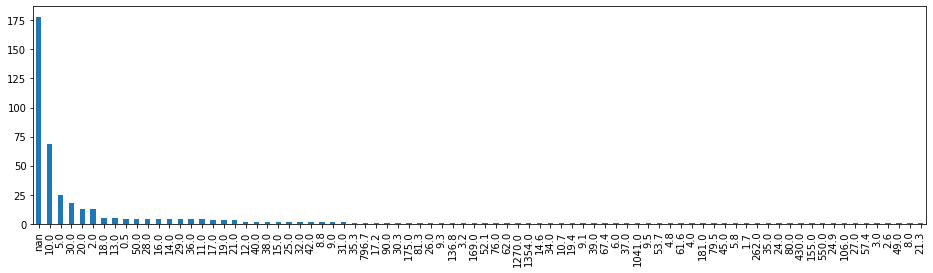

Manganese_2020 - min:0.5, max:1354.0, mean:42.57557251908397, trimmed mean 80%:17.166666666666668
--------------


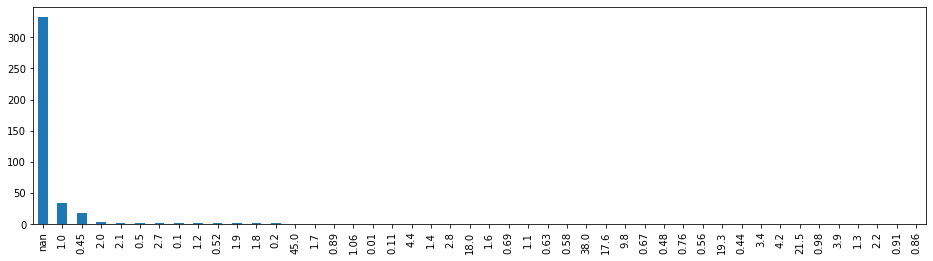

Nitrate_2019 - min:0.01, max:45.0, mean:2.6025, trimmed mean 80%:1.100681818181818
--------------


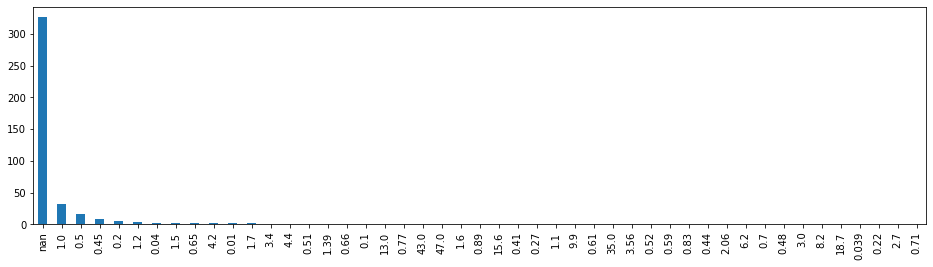

Nitrate_2020 - min:0.01, max:47.0, mean:2.5886754385964914, trimmed mean 80%:0.9638043478260871
--------------


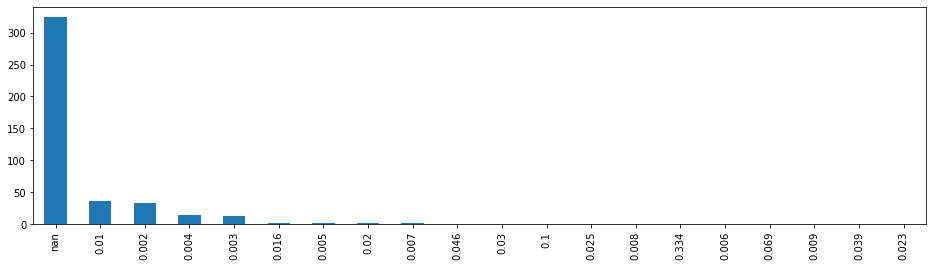

Nitrite_2019 - min:0.002, max:0.334, mean:0.011344827586206897, trimmed mean 80%:0.006085106382978724
--------------


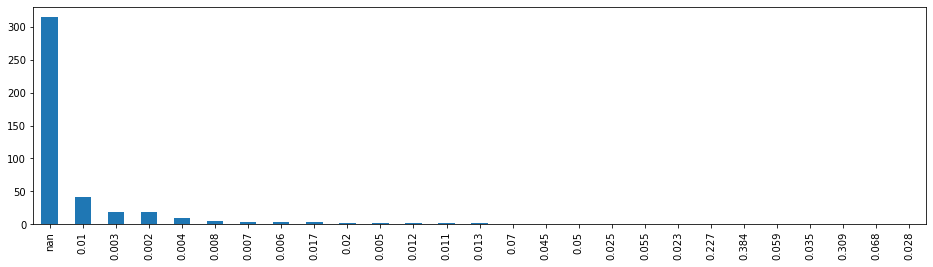

Nitrite_2020 - min:0.002, max:0.384, mean:0.017432000000000003, trimmed mean 80%:0.007920792079207921
--------------


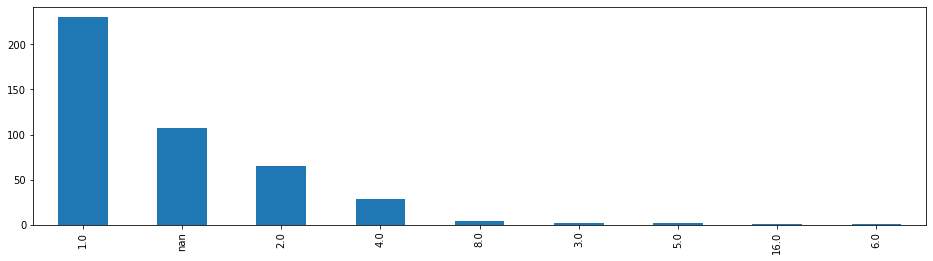

Odour-dilution-level_2019 - min:1.0, max:16.0, mean:1.6276276276276276, trimmed mean 80%:1.2921348314606742
--------------


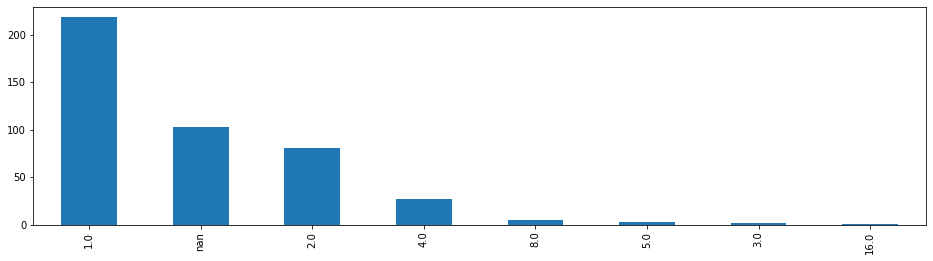

Odour-dilution-level_2020 - min:1.0, max:16.0, mean:1.6765578635014837, trimmed mean 80%:1.3468634686346863
--------------


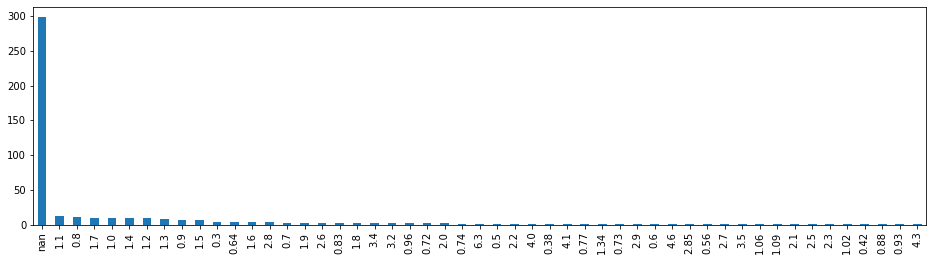

Oxidability_2019 - min:0.3, max:6.3, mean:1.4496478873239438, trimmed mean 80%:1.2945614035087718
--------------


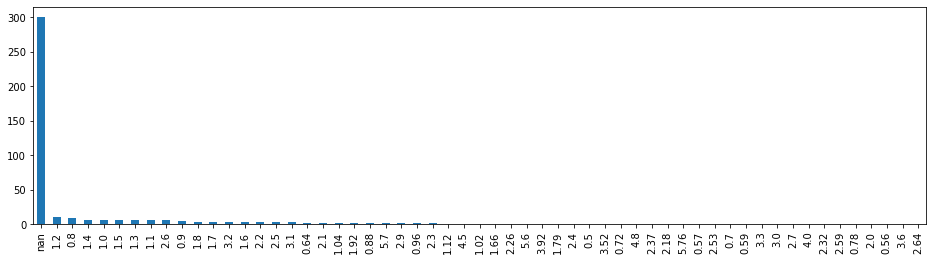

Oxidability_2020 - min:0.5, max:5.76, mean:1.8227142857142857, trimmed mean 80%:1.6560714285714286
--------------


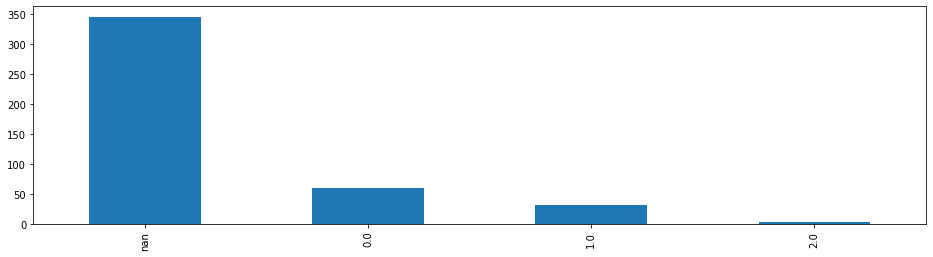

Smell-ball-units_2019 - min:0.0, max:2.0, mean:0.4105263157894737, trimmed mean 80%:0.33766233766233766
--------------


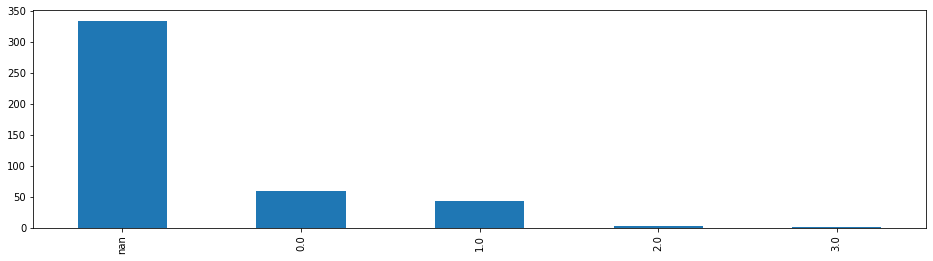

Smell-ball-units_2020 - min:0.0, max:3.0, mean:0.49056603773584906, trimmed mean 80%:0.43023255813953487
--------------


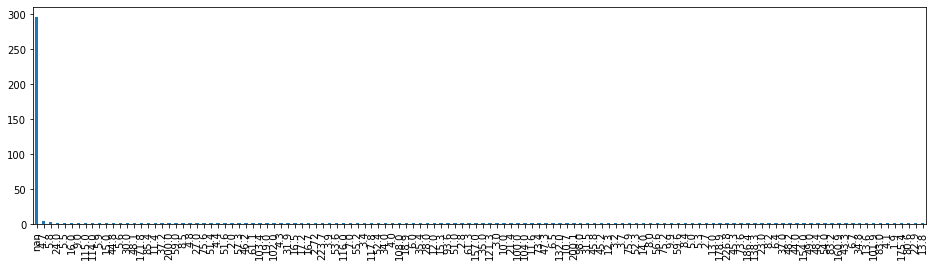

Sodium_2019 - min:1.9, max:226.8, mean:49.16819444444444, trimmed mean 80%:39.7198275862069
--------------


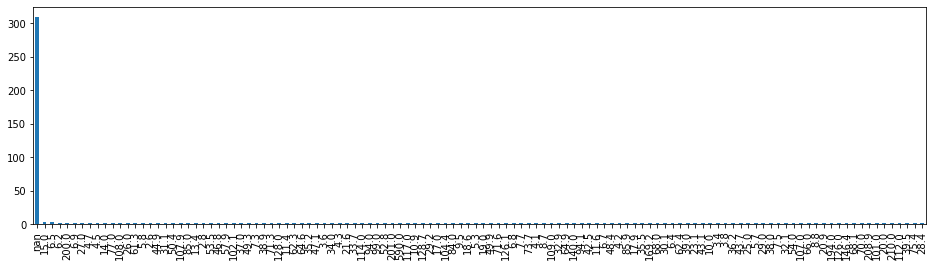

Sodium_2020 - min:2.6, max:590.0, mean:56.4648854961832, trimmed mean 80%:44.78190476190476
--------------


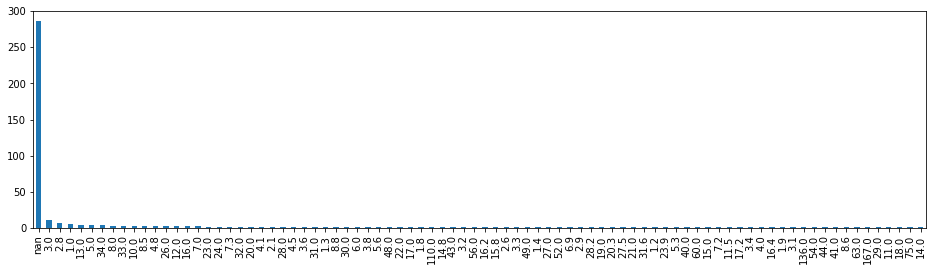

Sulphate_2019 - min:1.0, max:167.0, mean:17.73181818181818, trimmed mean 80%:13.417741935483871
--------------


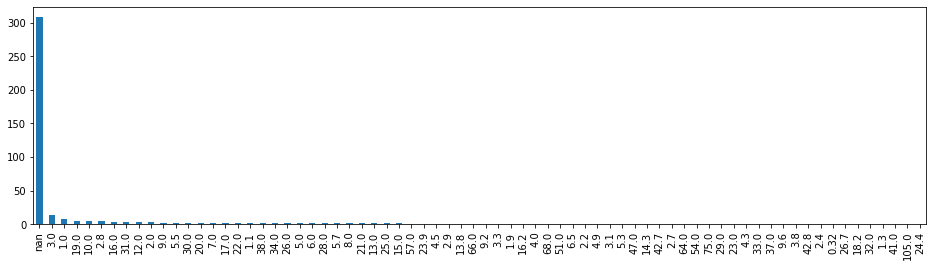

Sulphate_2020 - min:0.32, max:105.0, mean:16.347121212121213, trimmed mean 80%:13.137735849056602
--------------


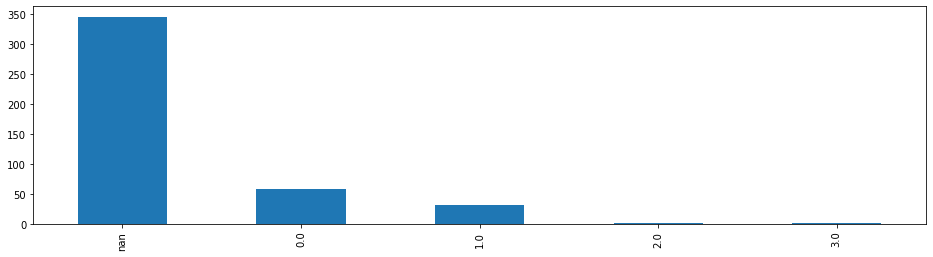

Taste-ball-units_2019 - min:0.0, max:3.0, mean:0.4148936170212766, trimmed mean 80%:0.34210526315789475
--------------


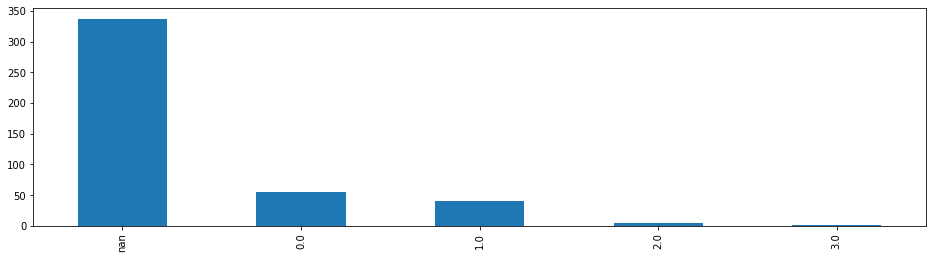

Taste-ball-units_2020 - min:0.0, max:3.0, mean:0.5242718446601942, trimmed mean 80%:0.4457831325301205
--------------


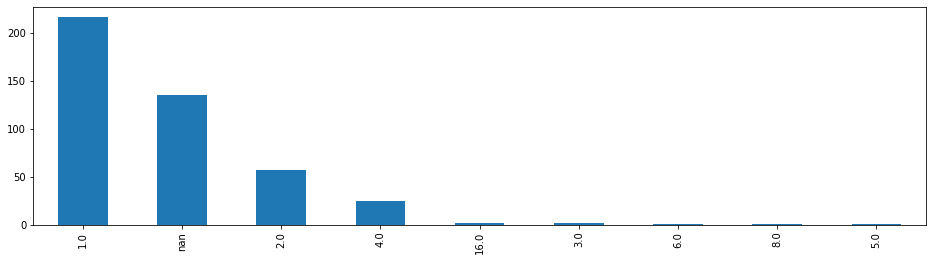

Taste-dilution-degree_2019 - min:1.0, max:16.0, mean:1.5967213114754097, trimmed mean 80%:1.2489795918367348
--------------


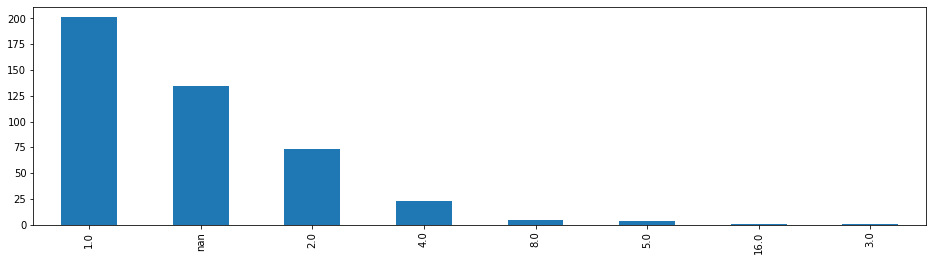

Taste-dilution-degree_2020 - min:1.0, max:16.0, mean:1.6503267973856208, trimmed mean 80%:1.3170731707317074
--------------


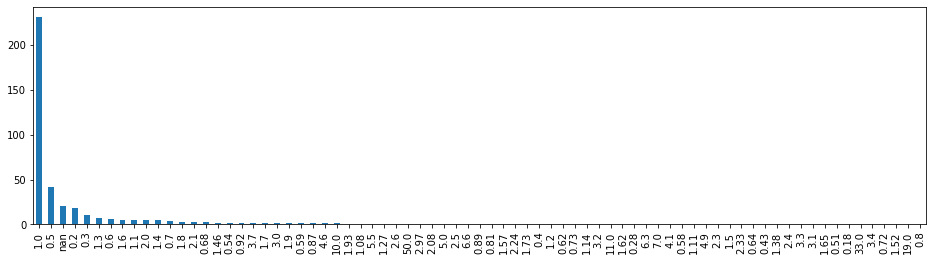

Turbidity-NTU_2019 - min:0.18, max:50.0, mean:1.4040811455847253, trimmed mean 80%:0.9749851632047477
--------------


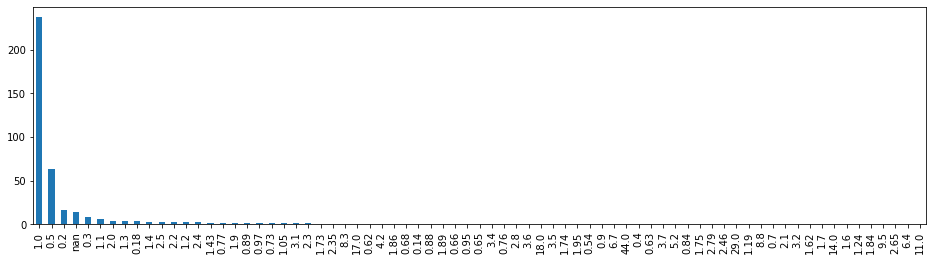

Turbidity-NTU_2020 - min:0.14, max:44.0, mean:1.3953286384976529, trimmed mean 80%:0.9504385964912281
--------------


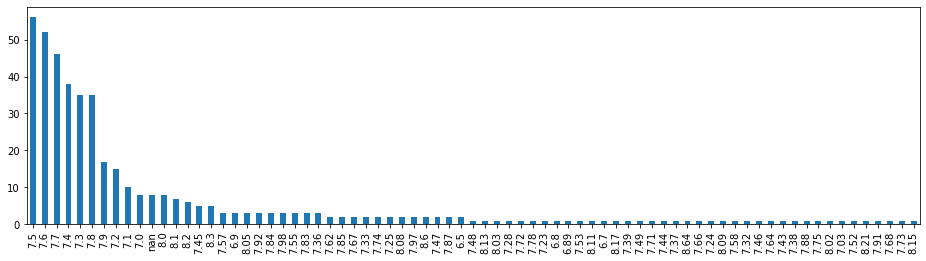

pH _2019 - min:6.5, max:8.64, mean:7.5868518518518515, trimmed mean 80%:7.583034682080925
--------------


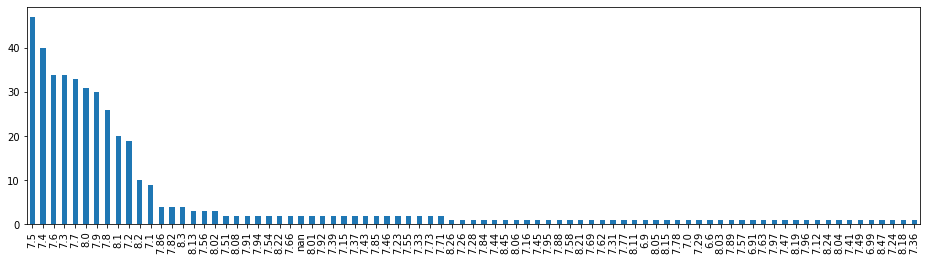

pH _2020 - min:6.6, max:8.47, mean:7.652922374429225, trimmed mean 80%:7.650511363636363
--------------


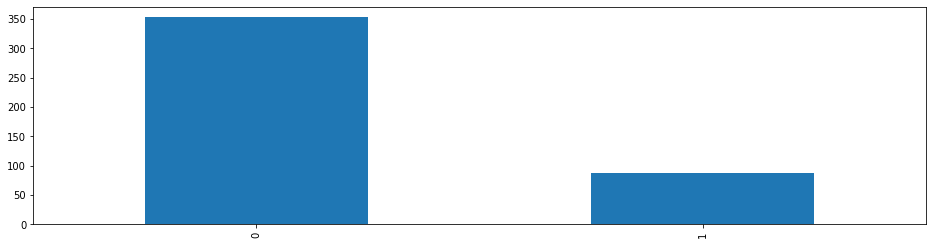

compliance_2019 - min:0, max:1, mean:0.19772727272727272, trimmed mean 80%:0.12215909090909091
--------------


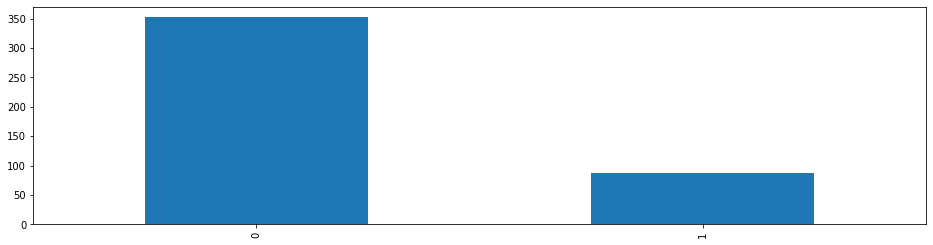

compliance_2020 - min:0, max:1, mean:0.2, trimmed mean 80%:0.125
--------------


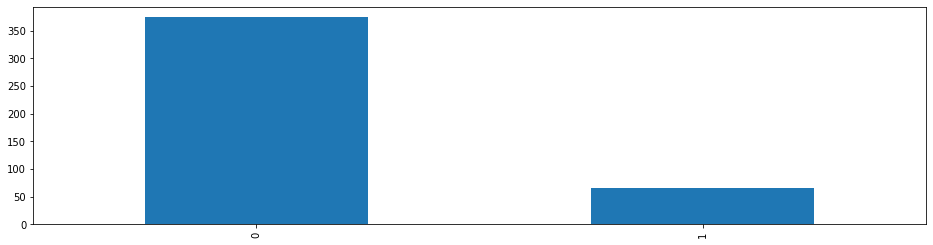

compliance_2021 - min:0, max:1, mean:0.15, trimmed mean 80%:0.0625
--------------


In [ ]:
from IPython.display import display
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
plt.rcParams['figure.figsize'] = [16, 4]

# print/plot/etc. for analysis
for col in df.columns:
  #display(df[col].value_counts(dropna=False))
  d = df[col]
  display(d.value_counts(dropna=False).plot.bar())
  plt.show()
  dv = d.values[~np.isnan(d.values)]
  print(f'{col} - min:{d.min()}, max:{d.max()}, mean:{d.mean()}, trimmed mean 80%:{stats.trim_mean(dv, 0.1)}')
  print("--------------")

In [ ]:
def preprocess(df):
  if 'station_id' in df.columns:
    df = df.drop('station_id', axis=1)

  # replace nan values with the trimmed mean of the column
  for col in df.columns:
    dv = df.values[~np.isnan(df.values)]
    df[col] = df[col].fillna(stats.trim_mean(dv, 0.1))
  return df

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('compliance_2021', axis=1)
y = df['compliance_2021']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
X_train = preprocess(X_train)
X_test = preprocess(X_test)

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X_train, y_train)
model.score(X_test, y_test)

# 0.83 accuracy, up from 0.82 accuracy with fillna=0
# could this just be the ph level affecting the result? most other values can be 0 or very close and in compliance.
# kaggle_test_copy = preprocess(kaggle_test)
# pred = model.predict(kaggle_test_copy)
# submission = pd.DataFrame({'station_id': kaggle_test['station_id'], 'compliance_2021': pred})
# submission.to_csv('svc_linear.csv', index=False)

0.8181818181818182

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='poly', degree=2, gamma='auto', random_state=0xC0FFEE)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

pred = model.predict(preprocess(kaggle_test))
print(pred)
#70% kaggle
submission = pd.DataFrame({'station_id': kaggle_test['station_id'], 'compliance_2021': pred})
submission.to_csv('svc_poly.csv', index=False)

0.7727272727272727
[1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0
 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0
 0 0 0 0]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy', random_state=0xC0FFEE)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

pred = model.predict(preprocess(kaggle_test))
print(pred)
#error% kaggle
submission = pd.DataFrame({'station_id': kaggle_test['station_id'], 'compliance_2021': pred})
submission.to_csv('decisiontree_entropy.csv', index=False)

0.75
[1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0 1 0
 1 0 0 0]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion='entropy', random_state=0xC0FFEE)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))


pred = model.predict(preprocess(kaggle_test))
print(pred)

#91% kaggle
submission = pd.DataFrame({'station_id': kaggle_test['station_id'], 'compliance_2021': pred})
submission.to_csv('randomforest_entropy.csv', index=False)

0.8295454545454546
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0]


In [ ]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)

param = {'eval_metric': 'auc', 'num_class': 1, 'objective': 'binary:logistic'}
eval_list = [(dtrain, 'train'), (dtest, 'eval')]
model = xgb.train(param, dtrain, 500, eval_list, early_stopping_rounds=50, verbose_eval=True)
pred = model.predict(xgb.DMatrix(kaggle_test_copy))
submission = pd.DataFrame({'station_id': kaggle_test['station_id'], 'compliance_2021': np.round(pred).astype(int)})
submission.to_csv('xgb_auc.csv', index=False)

[0]	train-auc:0.859402	eval-auc:0.58114
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 50 rounds.
[1]	train-auc:0.894637	eval-auc:0.538925
[2]	train-auc:0.91387	eval-auc:0.504934
[3]	train-auc:0.93242	eval-auc:0.550987
[4]	train-auc:0.9652	eval-auc:0.614035
[5]	train-auc:0.970016	eval-auc:0.594298
[6]	train-auc:0.983004	eval-auc:0.57511
[7]	train-auc:0.9881	eval-auc:0.563048
[8]	train-auc:0.99565	eval-auc:0.547149
[9]	train-auc:0.998229	eval-auc:0.543311
[10]	train-auc:0.999161	eval-auc:0.594846
[11]	train-auc:0.999379	eval-auc:0.561404
[12]	train-auc:0.999689	eval-auc:0.567982
[13]	train-auc:0.999814	eval-auc:0.580044
[14]	train-auc:1	eval-auc:0.567982
[15]	train-auc:1	eval-auc:0.551535
[16]	train-auc:1	eval-auc:0.542763
[17]	train-auc:1	eval-auc:0.554825
[18]	train-auc:1	eval-auc:0.552632
[19]	train-auc:1	eval-auc:0.547149
[20]	train-auc:1	eval-auc:0.557018
[21]	train-auc:1	eval-auc:0.567982
[22]	train

# 3 balancing data

Preprocessing

In [ ]:
import pandas as pd
train_data_url = 'https://drive.google.com/uc?id=1bJjSZDAfn7UbX2xt0I-VmsLAjk9n7IXh'
kaggle_test_url = 'https://drive.google.com/uc?id=1SH_Xo_MjrLuMICFmpD4exHFrN8YbeRE8'
df = pd.read_csv(train_data_url, delimiter=',')
df_kaggle_orig = pd.read_csv(kaggle_test_url, delimiter=',')

In [ ]:
import numpy as np
from scipy import stats
def preprocess(df):
  if 'station_id' in df.columns:
    df = df.drop('station_id', axis=1)

  # replace nan values with the trimmed mean of the column
  for col in df.columns:
    dv = df.values[~np.isnan(df.values)]
    df[col] = df[col].fillna(stats.trim_mean(dv, 0.1))
  return df

In [ ]:
from sklearn.model_selection import train_test_split

minority_class = df[df['compliance_2021'] == 1]
majority_class = df[df['compliance_2021'] == 0].sample(len(minority_class), random_state=0xC0FFEE)

df_balanced = pd.concat([minority_class, majority_class])
df_balanced.sort_index(inplace=True)

X = df_balanced.drop('compliance_2021', axis=1)
y = df_balanced['compliance_2021']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0xC0FFEE)
X_train = preprocess(X_train)
X_test = preprocess(X_test)

df_kaggle = preprocess(df_kaggle_orig)

In [ ]:
y_test

120    1
337    0
23     0
89     1
320    1
7      0
312    0
316    0
180    1
399    1
250    1
6      0
429    1
401    0
35     1
158    0
110    1
374    1
235    1
247    0
126    1
276    0
243    1
131    0
200    1
304    0
47     0
Name: compliance_2021, dtype: int64

Training models

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
model.predict(df_kaggle)


#pred = model.predict(df_kaggle)
# submission = pd.DataFrame({'station_id': kaggle_test['station_id'], 'compliance_2021': pred})
# submission.to_csv('svc_linear.csv', index=False)

0.5555555555555556


array([0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0])

In [ ]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)

param = {'eval_metric': 'auc', 'num_class': 1, 'objective': 'binary:logistic'}
eval_list = [(dtrain, 'train'), (dtest, 'eval')]
model = xgb.train(param, dtrain, 500, eval_list, early_stopping_rounds=50, verbose_eval=True)
# worse than xgb with all the data
pred = model.predict(xgb.DMatrix(df_kaggle))
submission = pd.DataFrame({'station_id': df_kaggle_orig['station_id'], 'compliance_2021': np.round(pred).astype(int)})
submission.to_csv('xgb_auc.csv', index=False)

[0]	train-auc:0.94648	eval-auc:0.747253
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 50 rounds.
[1]	train-auc:0.959906	eval-auc:0.82967
[2]	train-auc:0.974419	eval-auc:0.793956
[3]	train-auc:0.988389	eval-auc:0.752747
[4]	train-auc:0.993106	eval-auc:0.752747
[5]	train-auc:0.998549	eval-auc:0.733516
[6]	train-auc:0.998911	eval-auc:0.714286
[7]	train-auc:1	eval-auc:0.697802
[8]	train-auc:1	eval-auc:0.708791
[9]	train-auc:1	eval-auc:0.697802
[10]	train-auc:1	eval-auc:0.675824
[11]	train-auc:1	eval-auc:0.686813
[12]	train-auc:1	eval-auc:0.686813
[13]	train-auc:1	eval-auc:0.67033
[14]	train-auc:1	eval-auc:0.659341
[15]	train-auc:1	eval-auc:0.675824
[16]	train-auc:1	eval-auc:0.67033
[17]	train-auc:1	eval-auc:0.664835
[18]	train-auc:1	eval-auc:0.664835
[19]	train-auc:1	eval-auc:0.675824
[20]	train-auc:1	eval-auc:0.67033
[21]	train-auc:1	eval-auc:0.675824
[22]	train-auc:1	eval-auc:0.686813
[23]	train-auc:1	eva

In [ ]:
##balance with duplicating test
from sklearn.model_selection import train_test_split

minority_class = df[df['compliance_2021'] == 1]
majority_class = df[df['compliance_2021'] == 0]

df_balanced = pd.concat([minority_class, minority_class, minority_class, minority_class, minority_class, majority_class])
df_balanced.sort_index(inplace=True)

X = df_balanced.drop('compliance_2021', axis=1)
y = df_balanced['compliance_2021']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0xC0FFEE)
X_train = preprocess(X_train)
X_test = preprocess(X_test)

df_kaggle = preprocess(df_kaggle_orig)

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
model.predict(df_kaggle)

KeyboardInterrupt: ignored

In [ ]:
from numpy.random.mtrand import random_sample
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(5)
model.fit(X_train, y_train)
model.score(X_test, y_test)

In [ ]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)

param = {'eval_metric': 'auc', 'num_class': 1, 'objective': 'binary:logistic'}
eval_list = [(dtrain, 'train'), (dtest, 'eval')]
model = xgb.train(param, dtrain, 500, eval_list, early_stopping_rounds=50, verbose_eval=True)

# same result as xgb without data balancing with duplication
# also leaking data between train and test
pred = model.predict(xgb.DMatrix(df_kaggle))
submission = pd.DataFrame({'station_id': df_kaggle_orig['station_id'], 'compliance_2021': np.round(pred).astype(int)})
submission.to_csv('xgb_auc.csv', index=False)

[0]	train-auc:0.918777	eval-auc:0.763917
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 50 rounds.
[1]	train-auc:0.95353	eval-auc:0.889976
[2]	train-auc:0.98315	eval-auc:0.93576
[3]	train-auc:0.988739	eval-auc:0.945139
[4]	train-auc:0.992497	eval-auc:0.961073
[5]	train-auc:0.996324	eval-auc:0.972771
[6]	train-auc:0.998137	eval-auc:0.979427
[7]	train-auc:0.998733	eval-auc:0.977007
[8]	train-auc:0.999632	eval-auc:0.985881
[9]	train-auc:0.999848	eval-auc:0.988302
[10]	train-auc:1	eval-auc:0.990924
[11]	train-auc:1	eval-auc:0.993949
[12]	train-auc:1	eval-auc:0.996773
[13]	train-auc:1	eval-auc:0.997176
[14]	train-auc:1	eval-auc:0.997176
[15]	train-auc:1	eval-auc:0.997176
[16]	train-auc:1	eval-auc:0.997176
[17]	train-auc:1	eval-auc:0.997176
[18]	train-auc:1	eval-auc:0.997983
[19]	train-auc:1	eval-auc:0.997983
[20]	train-auc:1	eval-auc:0.99879
[21]	train-auc:1	eval-auc:0.99879
[22]	train-auc:1	eval-auc:0.999193

In [ ]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)

param = {'eval_metric': 'auc', 'num_class': 1, 'objective': 'binary:hinge'}
eval_list = [(dtrain, 'train'), (dtest, 'eval')]
model = xgb.train(param, dtrain, 500, eval_list, early_stopping_rounds=50, verbose_eval=True)

# same result as xgb without data balancing with duplication
pred = model.predict(xgb.DMatrix(df_kaggle))
pred.astype(int)
# submission = pd.DataFrame({'station_id': df_kaggle_orig['station_id'], 'compliance_2021': np.round(pred).astype(int)})
# submission.to_csv('xgb_auc.csv', index=False)

[0]	train-auc:0.5	eval-auc:0.5
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 50 rounds.
[1]	train-auc:0.5	eval-auc:0.5
[2]	train-auc:0.990566	eval-auc:0.57967
[3]	train-auc:0.990566	eval-auc:0.582418
[4]	train-auc:1	eval-auc:0.546703
[5]	train-auc:0.990385	eval-auc:0.623626
[6]	train-auc:0.990385	eval-auc:0.585165
[7]	train-auc:1	eval-auc:0.549451
[8]	train-auc:1	eval-auc:0.513736
[9]	train-auc:1	eval-auc:0.552198
[10]	train-auc:1	eval-auc:0.549451
[11]	train-auc:1	eval-auc:0.513736
[12]	train-auc:1	eval-auc:0.549451
[13]	train-auc:1	eval-auc:0.513736
[14]	train-auc:1	eval-auc:0.513736
[15]	train-auc:1	eval-auc:0.552198
[16]	train-auc:1	eval-auc:0.590659
[17]	train-auc:1	eval-auc:0.590659
[18]	train-auc:1	eval-auc:0.585165
[19]	train-auc:1	eval-auc:0.552198
[20]	train-auc:1	eval-auc:0.585165
[21]	train-auc:1	eval-auc:0.590659
[22]	train-auc:1	eval-auc:0.585165
[23]	train-auc:1	eval-auc:0.554945
[24]	tra

array([1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1])

# 4. deep learning

In [ ]:
import pandas as pd
train_data_url = 'https://drive.google.com/uc?id=1bJjSZDAfn7UbX2xt0I-VmsLAjk9n7IXh'
kaggle_test_url = 'https://drive.google.com/uc?id=1SH_Xo_MjrLuMICFmpD4exHFrN8YbeRE8'
df = pd.read_csv(train_data_url, delimiter=',')
df_kaggle_orig = pd.read_csv(kaggle_test_url, delimiter=',')

In [ ]:
import numpy as np
from scipy import stats
from sklearn import preprocessing

def preprocess(df):
  if 'station_id' in df.columns:
    df = df.drop('station_id', axis=1)

  # replace nan values with the trimmed mean of the column
  for col in df.columns:
    dv = df.values[~np.isnan(df.values)]
    df[col] = df[col].fillna(stats.trim_mean(dv, 0.1))
  return pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(df.values))

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('compliance_2021', axis=1)
y = df['compliance_2021']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
X_train = preprocess(X_train)
X_test = preprocess(X_test)

In [ ]:
from tensorflow.keras.layers import Input, Conv1D, Activation, Flatten, Dense, MaxPooling2D, BatchNormalization, Dropout

x = Input(shape=(56, 1))

h1 = Dense(56)(x)
a1 = Activation('relu')(h1)
b1 = BatchNormalization()(a1)
d1 = Dropout(rate=0.25)(b1)

z = Dense(10)(d1)
# c1 = Conv1D(56, 3, strides=1, padding="same")(x)
# b1 = BatchNormalization()(c1)
# a1 = Activation('relu')(b1)
# d2 = Dropout(rate=0.25)(a1)
# h3 = Dense(32)(d2)
# z = Dense(10)(h3)

# c1 = Conv2D(32, (3, 3), strides=(1, 1), padding="same")(x)
# b1 = BatchNormalization()(c1)
# a1 = Activation('relu')(b1)
# c2 = Conv2D(32, (3, 3), strides=(1, 1), padding="valid")(a1)
# b2 = BatchNormalization()(c2)
# a2 = Activation('relu')(b2)
# p2 = MaxPooling2D(pool_size=2)(a2)
# d2 = Dropout(rate=0.25)(p2)
# f2 = Flatten()(d2) # tensor into vector
# h3 = Dense(100)(f2)
# b3 = BatchNormalization()(h3)
# a3 = Activation('relu')(b3)
# d3 = Dropout(rate=0.5)(a3)
# z = Dense(10)(d3)
p = Activation('softmax')(z)

In [ ]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam

# model = Model(inputs=x, outputs=p)
# model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
# model.summary()

model = Sequential() 

model.add(Dense(56, activation="tanh", input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(28, activation="tanh"))
model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add(Dense(14, activation="relu"))
model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add(Dense(2, activation="softmax"))
model.add(Dense(1, activation="linear"))
model.compile(loss='mean_squared_error', optimizer="adam", metrics=['accuracy'])

model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_97 (Dense)            (None, 56)                3192      
                                                                 
 batch_normalization_69 (Bat  (None, 56)               224       
 chNormalization)                                                
                                                                 
 dropout_69 (Dropout)        (None, 56)                0         
                                                                 
 dense_98 (Dense)            (None, 28)                1596      
                                                                 
 dropout_70 (Dropout)        (None, 28)                0         
                                                                 
 batch_normalization_70 (Bat  (None, 28)               112       
 chNormalization)                                    

In [ ]:
np.random.seed(0xC0FFEE)
history = model.fit(X_train, y_train, batch_size=64, epochs=15, validation_split=0.1)#class_weight={0: 0.5, 1: 0.9})

Epoch 1/15
5/5 [==============================] - 0s 22ms/step - loss: 0.2243 - accuracy: 0.7975 - val_loss: 0.0797 - val_accuracy: 0.9167
Epoch 2/15
5/5 [==============================] - 0s 9ms/step - loss: 0.2114 - accuracy: 0.7627 - val_loss: 0.0792 - val_accuracy: 0.9167
Epoch 3/15
5/5 [==============================] - 0s 10ms/step - loss: 0.1974 - accuracy: 0.7880 - val_loss: 0.0794 - val_accuracy: 0.9167
Epoch 4/15
5/5 [==============================] - 0s 13ms/step - loss: 0.2159 - accuracy: 0.7627 - val_loss: 0.0794 - val_accuracy: 0.9167
Epoch 5/15
5/5 [==============================] - 0s 9ms/step - loss: 0.1942 - accuracy: 0.7785 - val_loss: 0.0800 - val_accuracy: 0.9167
Epoch 6/15
5/5 [==============================] - 0s 9ms/step - loss: 0.2036 - accuracy: 0.7658 - val_loss: 0.0804 - val_accuracy: 0.9167
Epoch 7/15
5/5 [==============================] - 0s 10ms/step - loss: 0.1887 - accuracy: 0.8006 - val_loss: 0.0803 - val_accuracy: 0.9167
Epoch 8/15
5/5 [==============

In [ ]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 4ms/step - loss: 0.1459 - accuracy: 0.8068


[0.1458502858877182, 0.8068181872367859]

In [ ]:
pred = np.round(model.predict(preprocess(df_kaggle_orig))).astype(int)
submission = pd.DataFrame({'station_id': df_kaggle_orig['station_id'].values, 'compliance_2021': pred.reshape(189)})
submission.to_csv('keras.csv', index=False)
# np.round(model.predict(preprocess(df_kaggle_orig))).astype(int)

6/6 [==============================] - 0s 4ms/step
